<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/100Resistores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats


In [2]:
#Valor nominal ou do fabricante
R_ref= 890.0 #(kΩ)

In [3]:
##Exemplo: Medidas dos 100 resistores de 890 ± 5% (kΩ)

array_100 = [854,854,865,869,875,883,896,801,895,896,800,803,806,809,811,822,816,827,817,821,826,830,831,829,830,841,836,847,840,838,860,853,848,842,844,849,846,849,850,853,856,855,858,853,857,863,857,863,861,863,872,855,863,863,874,869,881,874,881,885,874,872,872,879,873,878,879,876,878,882,878,876,881,888,884,879,883,884,885,885,886,897,893,899,801,888,898,802,899,893,888,895,813,892,893,897,895,898,889,895]
array_GR01 = [854,854,865,869,875,883,896,801,895,896,800,803,806,809,811,822,816,827,817,821] #(k ohms)
array_GR02 = [826,830,831,829,830,841,836,847,840,838,860,853,848,842,844,849,846,849,850,853] #(k ohms)
array_GR03 = [856,855,858,853,857,863,857,863,861,863,872,855,863,863,874,869,881,874,881,885] #(k ohms)
array_GR04 = [874,872,872,879,873,878,879,876,878,882,878,876,881,888,884,879,883,884,885,885] #(k ohms)
array_GR05 = [886,897,893,899,801,888,898,802,899,893,888,895,813,892,893,897,895,898,889,895] #(k ohms)


In [4]:
def compatibilidade(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-np.mean(array_100))/ec
  if d<=2.0:
    print("Compatível", d, ec, abs(np.mean(grupo)-np.mean(array_100)))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,ec, abs(np.mean(grupo)-np.mean(array_100)))
  else:
    print("Incompatível", d,ec,abs(np.mean(grupo)-np.mean(array_100)))
  return(d)

In [5]:
def compatibilidadeRef(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  #egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  #ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-R_ref)/e100
  if d<=2.0:
    print("Compatível", d, e100, abs(np.mean(grupo)-R_ref))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,e100, abs(np.mean(grupo)-R_ref))
  else:
    print("Incompatível", d,e100,abs(np.mean(grupo)-R_ref))
  return(d)

Conjunto completo de valores de resistências (100):

In [6]:

amplitude_100=(np.max(array_100)-np.min(array_100))
print ( "Valor mínimo: {}".format( np.min(array_100) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_100) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_100 ) ,"(kΩ)")

Valor mínimo: 800 (kΩ)
Valor máximo: 899 (kΩ)
Amplitude: 99 (kΩ)


In [7]:
#Calculo da média
N100=len(array_100)
media_100=(np.sum(array_100)/N100)
vmin = np.min(array_100)
vmax = np.max(array_100)
print("média do conjunto de 100 resistores: {}".format( (media_100)),"(kΩ)")

média do conjunto de 100 resistores: 861.62 (kΩ)


In [8]:
#Usando o NumPy
np.mean( array_100 )

861.62

In [9]:
print("média do conjunto de 100 resistores: {}".format(np.mean( array_100 )),"(kΩ)")



média do conjunto de 100 resistores: 861.62 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Conjunto Completo de 100 Resistores')

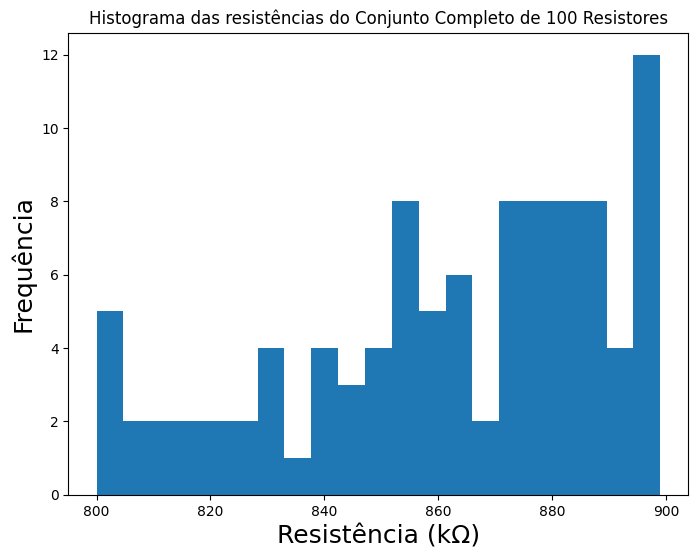

In [10]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_100, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Conjunto Completo de 100 Resistores', fontsize=12 )




Variância e desvio Padrão usando o NumPY:

In [11]:
var_100 = np.var( array_100, ddof=0 )
print ( "Variância do conj. de 100 resistores: {}".format(var_100),"(k^2Ω)" )
print ( "Desvio Padrao do conj. de 100 resistores: {}".format(np.sqrt(var_100)),"(kΩ)" )
sigma_m100 = np.std( array_100, ddof=0 )/np.sqrt(N100)
print ( "Erro da média do conj. de 100: {}".format(np.std( array_100, ddof=1 )/np.sqrt(N100)),"(kΩ)" )

Variância do conj. de 100 resistores: 776.2156000000001 (k^2Ω)
Desvio Padrao do conj. de 100 resistores: 27.860646080089385 (kΩ)
Erro da média do conj. de 100: 2.8001002868043168 (kΩ)


Estimativa Padrão dos 100 resistores:

In [12]:
print ( "R100 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_100 ), 0 ), np.round( sigma_m100, 0 ) ) )


R100 = 862 ± 3 (kΩ)


Grupo 01 de valores de resistências:

In [13]:
amplitude_GR01=(np.max(array_GR01)-np.min(array_GR01))
print ( "Valor mínimo: {}".format( np.min(array_GR01) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR01) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR01 ) ,"(kΩ)")

Valor mínimo: 800 (kΩ)
Valor máximo: 896 (kΩ)
Amplitude: 96 (kΩ)


In [14]:
#Usando o NumPy
np.mean( array_GR01 )

841.0

In [15]:
#Calculo da média
N1_20=len(array_GR01)
media_GR01=(np.sum(array_GR01)/N1_20)
vmin = np.min(array_GR01)
vmax = np.max(array_GR01)

print("média do conjunto de 20 resistores do Grupo 01: {}".format( (media_GR01)),"(kΩ)")

média do conjunto de 20 resistores do Grupo 01: 841.0 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Grupo 01 de 20 Resistores')

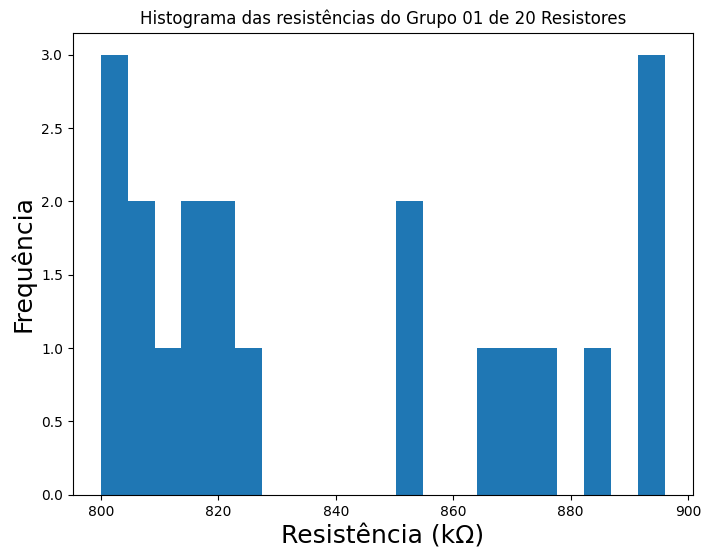

In [16]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR01, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 01 de 20 Resistores', fontsize=12 )


In [17]:
var_gr1 = np.var( array_GR01, ddof=0 )
print ( "Variância do Grupo 01: {}".format(var_gr1), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 01: {}".format(np.sqrt(var_gr1)),"(kΩ)" )
sigma_m1 = np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)
print ( "Erro da média do Grupo 01: {}".format(np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)),"(kΩ)" )

Variância do Grupo 01: 1180.8 (k^2Ω)
Desvio Padrao do do Grupo 01: 34.36277055186325 (kΩ)
Erro da média do Grupo 01: 7.883360223981436 (kΩ)


Estimativa Padrão GR01:

In [18]:
print ( "R1 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR01 ), 0 ), np.round( sigma_m1, 0 ) ) )


R1 = 841 ± 8 (kΩ)


Grupo 02 de valores de resistências:

In [19]:
#Calculo da média
N2_20=len(array_GR02)
media_GR02=(np.sum(array_GR02)/N2_20)
vmin = np.min(array_GR02)
vmax = np.max(array_GR02)
amplitude_GR02=(np.max(array_GR02)-np.min(array_GR02))
print ( "Valor mínimo: {}".format( np.min(array_GR02) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR02) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR02 ) ,"(kΩ)")
print("média do conjunto de 20 resistores do Grupo 02: {}".format( (media_GR02)),"(kΩ)")

Valor mínimo: 826 (kΩ)
Valor máximo: 860 (kΩ)
Amplitude: 34 (kΩ)
média do conjunto de 20 resistores do Grupo 02: 842.1 (kΩ)


In [20]:
#Usando o NumPy
np.mean( array_GR02 )

842.1

Text(0.5, 1.0, 'Histograma das resistências do Grupo 02 de 20 Resistores')

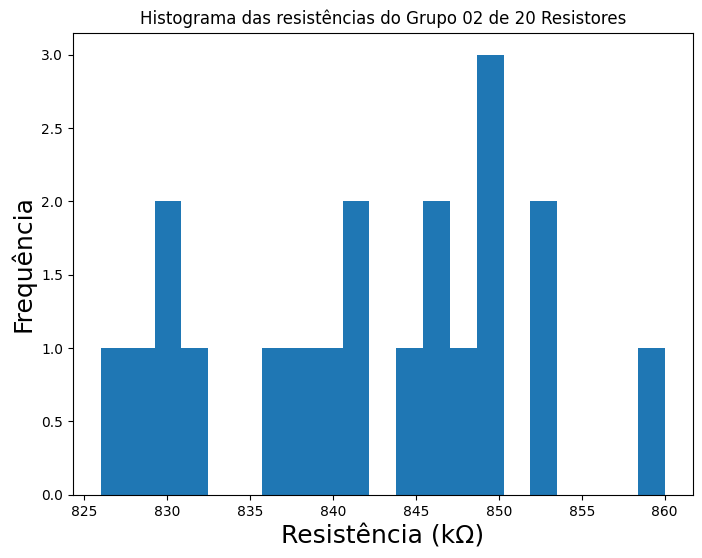

In [21]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR02, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 02 de 20 Resistores', fontsize=12 )


In [22]:
var_gr2 = np.var( array_GR02, ddof=0 )
print ( "Variância do Grupo 02: {}".format(var_gr2), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 02: {}".format(np.sqrt(var_gr2)),"(kΩ)" )
sigma_m2 = np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)
print ( "Erro da média do Grupo 02: {}".format(np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)),"(kΩ)" )

Variância do Grupo 02: 84.98999999999998 (k^2Ω)
Desvio Padrao do do Grupo 02: 9.219002115196632 (kΩ)
Erro da média do Grupo 02: 2.1149841358120964 (kΩ)


Estimativa Padrão GR02:

In [23]:
print ( "R2 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR02 ), 0 ), np.round( sigma_m2, 0 ) ) )


R2 = 842 ± 2 (kΩ)


Grupo 03 de valores de resistências:

In [24]:
#Calculo da média
N3_20=len(array_GR03)
media_GR03=(np.sum(array_GR03)/N3_20)
vmin = np.min(array_GR03)
vmax = np.max(array_GR03)
amplitude_GR03=(np.max(array_GR03)-np.min(array_GR03))
print ( "Valor mínimo: {}".format( np.min(array_GR03) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR03) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR03 ),"(kΩ)" )
print("média do conjunto de 20 resistores do Grupo 03: {}".format( (media_GR03)),"(kΩ)")

Valor mínimo: 853 (kΩ)
Valor máximo: 885 (kΩ)
Amplitude: 32 (kΩ)
média do conjunto de 20 resistores do Grupo 03: 865.15 (kΩ)


In [25]:
#Usando o NumPy
np.mean( array_GR03 )

865.15

Text(0.5, 1.0, 'Histograma das resistências do Grupo 03 de 20 Resistores')

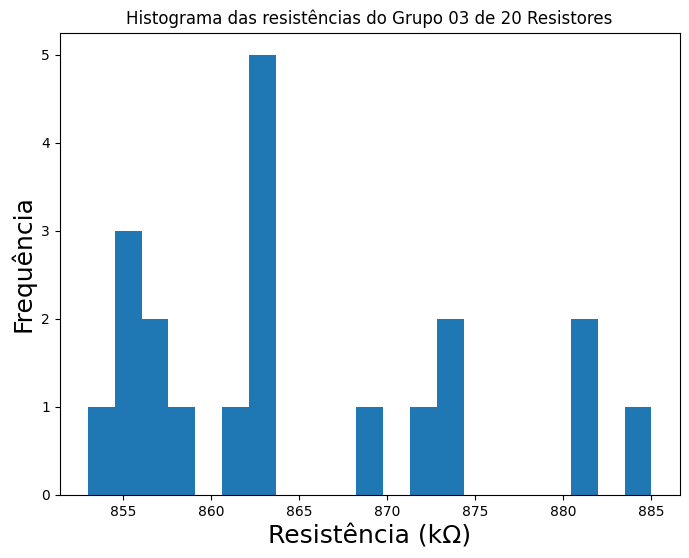

In [26]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR03, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 03 de 20 Resistores', fontsize=12 )


In [27]:
var_gr3 = np.var( array_GR03, ddof=0 )
print ( "Variância do Grupo 03: {}".format(var_gr3), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 03: {}".format(np.sqrt(var_gr3)),"(kΩ)" )
sigma_m3 = np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)
print ( "Erro da média do Grupo 03: {}".format(np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)),"(kΩ)" )

Variância do Grupo 03: 88.8275 (k^2Ω)
Desvio Padrao do do Grupo 03: 9.424834216048577 (kΩ)
Erro da média do Grupo 03: 2.162205258283165 (kΩ)


Estimativa Padrão GR03:

In [28]:
print ( "R3 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR03 ), 1 ), np.round( sigma_m3, 1 ) ) )


R3 = 865 ± 2 (kΩ)


Grupo 04 de valores de resistências:

In [29]:
#Calculo da média
N4_20=len(array_GR04)
media_GR04=(np.sum(array_GR04)/N4_20)
vmin = np.min(array_GR04)
vmax = np.max(array_GR04)
amplitude_GR04=(np.max(array_GR04)-np.min(array_GR04))
print ( "Valor mínimo: {}".format( np.min(array_GR04) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR04) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR04 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 04: {}".format( (media_GR04)),"(kΩ)")

Valor mínimo: 872 (kΩ)
Valor máximo: 888 (kΩ)
Amplitude: 16 (kΩ)
média do conjunto de 20 resistências do Grupo 04: 879.3 (kΩ)


In [30]:
#Usando o NumPy
np.mean( array_GR04 )

879.3

Text(0.5, 1.0, 'Histograma das resistências do Grupo 04 de 20 Resistores')

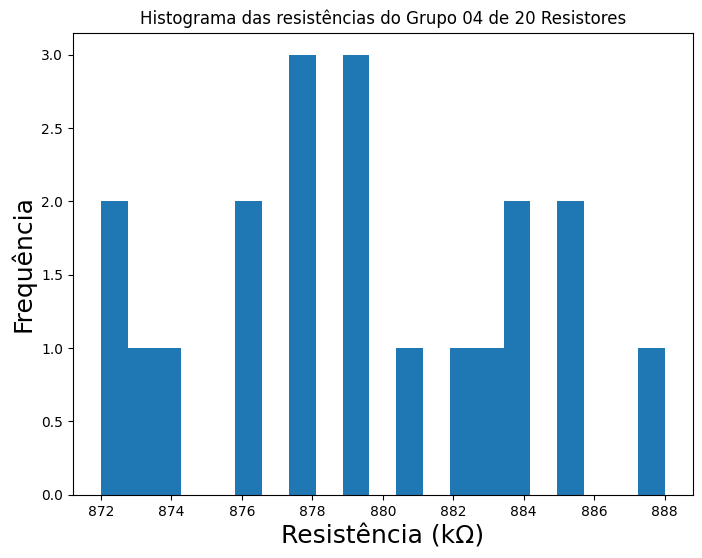

In [31]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR04, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 04 de 20 Resistores', fontsize=12 )


In [32]:
var_gr4 = np.var( array_GR04, ddof=0 )
print ( "Variância do Grupo 04: {}".format(var_gr4), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 04: {}".format(np.sqrt(var_gr4)),"(kΩ)" )
sigma_m4 = np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)
print ( "Erro da média do Grupo 04: {}".format(np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)),"(kΩ)" )

Variância do Grupo 04: 20.51 (k^2Ω)
Desvio Padrao do do Grupo 04: 4.528796749689701 (kΩ)
Erro da média do Grupo 04: 1.0389772298806776 (kΩ)


Estimativa Padrão GR04:

In [33]:
print ( "R4 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR04 ), 1 ), np.round( sigma_m4, 1 ) ) )


R4 = 879 ± 1 (kΩ)


Grupo 05 de valores de resistências:


In [34]:
#Calculo da média
N5_20=len(array_GR05)
media_GR05=(np.sum(array_GR05)/N5_20)
vmin = np.min(array_GR05)
vmax = np.max(array_GR05)
amplitude_GR05=(np.max(array_GR05)-np.min(array_GR05))
print ( "Valor mínimo: {}".format( np.min(array_GR05) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR05) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR05 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 05: {}".format( (media_GR05)),"(kΩ)")

Valor mínimo: 801 (kΩ)
Valor máximo: 899 (kΩ)
Amplitude: 98 (kΩ)
média do conjunto de 20 resistências do Grupo 05: 880.55 (kΩ)


In [35]:
#Usando o NumPy
np.mean( array_GR05 )

880.55

Text(0.5, 1.0, 'Histograma das resistências do Grupo 05 de 20 Resistores')

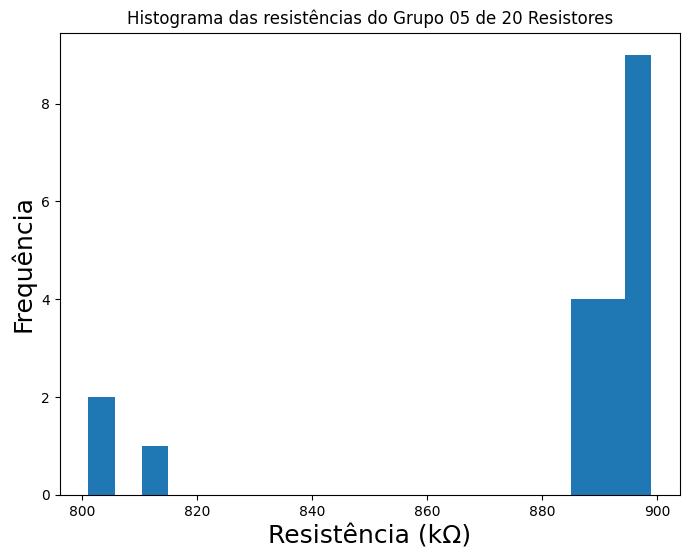

In [36]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR05, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 05 de 20 Resistores', fontsize=12 )

In [37]:
var_gr5 = np.var( array_GR05, ddof=1 )
print ( "Variância do Grupo 05: {}".format(var_gr5), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 05: {}".format(np.sqrt(var_gr5)),"(kΩ)" )
sigma_m5 = np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)
print ( "Erro da média do Grupo 05: {}".format(np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)),"(kΩ)" )

Variância do Grupo 05: 1069.8394736842106 (k^2Ω)
Desvio Padrao do do Grupo 05: 32.70840065922225 (kΩ)
Erro da média do Grupo 05: 7.313820730931988 (kΩ)


Estimativa Padrão GR05:


In [38]:
print ( "R5 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR05 ), 1 ), np.round( sigma_m5, 1 ) ) )


R5 = 881 ± 7 (kΩ)


Média das Médias:

In [39]:
array_GRM = [np.mean( array_GR01 ),np.mean( array_GR02 ),np.mean( array_GR03 ),np.mean( array_GR04),np.mean( array_GR05)] #kΩ

In [40]:
N=len(array_GRM)
media_GRM=(np.sum(array_GRM)/N)
vmin = np.min(array_GRM)
vmax = np.max(array_GRM)
amplitude_GRM=(np.max(array_GRM)-np.min(array_GRM))
print ( "Valor mínimo: {}".format( np.min(array_GRM) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GRM) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GRM ),"(kΩ)" )
print("média do conjunto das médias das resistências: {}".format( (media_GRM)),"(kΩ)")

Valor mínimo: 841.0 (kΩ)
Valor máximo: 880.55 (kΩ)
Amplitude: 39.549999999999955 (kΩ)
média do conjunto das médias das resistências: 861.6200000000001 (kΩ)


In [41]:
#Usando o NumPy
np.mean( array_GRM )

861.6200000000001

Text(0.5, 1.0, 'Histograma das resistências do grupo das médias')

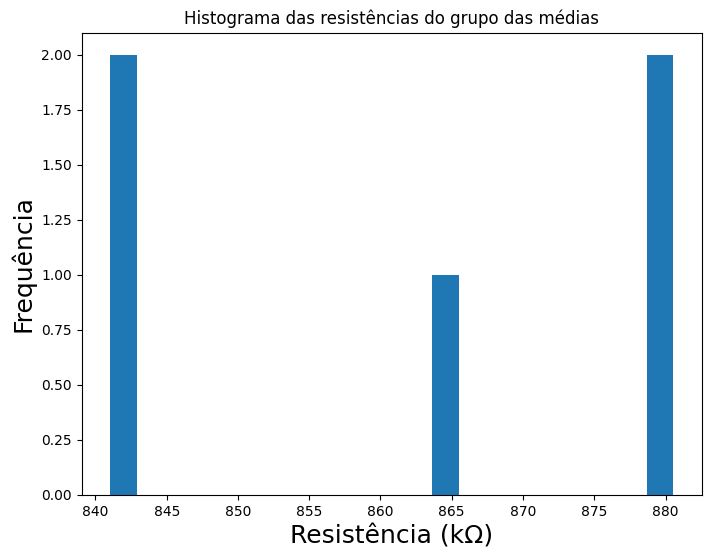

In [42]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GRM, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do grupo das médias', fontsize=12 )

In [43]:
var_grm = np.var( array_GRM, ddof=1 )
print ( "Variância do Grupo das médias: {}".format(var_grm), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo das médias: {}".format(np.sqrt(var_grm)),"(kΩ)" )
sigma_m = np.std( array_GRM, ddof=1 )/np.sqrt(N)
print ( "Erro da média do Grupo das médias: {}".format(np.std( array_GRM, ddof=1 )/np.sqrt(N)),"(kΩ)" )

Variância do Grupo das médias: 372.4007499999989 (k^2Ω)
Desvio Padrao do do Grupo das médias: 19.297687685316053 (kΩ)
Erro da média do Grupo das médias: 8.630188294585452 (kΩ)


Estimativa padrão do grupo das médias:

In [44]:
print ( "RM = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GRM ), 1 ), np.round( sigma_m, 1 ) ) )


RM = 862 ± 9 (kΩ)


Desvio Padrão do conjunto com 100 resistores:


In [45]:
sigma_L_p = np.std( array_100, ddof=0 )
print ( "Desvio padrão populacional (kΩ) = {}".format(sigma_L_p  ) )

sigma_L_a = np.std( array_100, ddof=1 )
print ( "Desvio padrão amostral (kΩ) = {}".format(sigma_L_a  ) )



Desvio padrão populacional (kΩ) = 27.860646080089385
Desvio padrão amostral (kΩ) = 28.00100286804317


Erro Relativo:

In [46]:
erro_relativo100 = sigma_m100 / media_100
print ( "Erro relativo das medidas dos 100 resistores = {}".format( erro_relativo100*100 ),"(kΩ)" )
erro_relativo1 = sigma_m1/ media_GR01
print ( "Erro relativo das medidas do grupo 1 = {}".format( erro_relativo1*100  ),"(kΩ)" )
erro_relativo2 = sigma_m2/ media_GR02
print ( "Erro relativo das medidas do grupo 2 = {}".format( erro_relativo2*100  ),"(kΩ)" )
erro_relativo3 = sigma_m3/ media_GR03
print ( "Erro relativo das medidas do grupo 3 = {}".format( erro_relativo3*100  ),"(kΩ)" )
erro_relativo4 = sigma_m4/ media_GR04
print ( "Erro relativo das medidas do grupo 4 = {}".format( erro_relativo4*100  ),"(kΩ)" )
erro_relativo5 = sigma_m5/ media_GR05
print ( "Erro relativo das medidas do grupo 5 = {}".format( erro_relativo5*100  ),"(kΩ)" )
erro_relativoM = sigma_m/ media_GRM
print ( "Erro relativo das medidas do grupo das médias = {}".format( erro_relativoM*100  ),"(kΩ)" )

Erro relativo das medidas dos 100 resistores = 0.32335189619657606 (kΩ)
Erro relativo das medidas do grupo 1 = 0.9373793369775787 (kΩ)
Erro relativo das medidas do grupo 2 = 0.2511559358522855 (kΩ)
Erro relativo das medidas do grupo 3 = 0.2499225866362093 (kΩ)
Erro relativo das medidas do grupo 4 = 0.11815958488350707 (kΩ)
Erro relativo das medidas do grupo 5 = 0.8305968691081698 (kΩ)
Erro relativo das medidas do grupo das médias = 1.0016234876842982 (kΩ)


Razão entre os erros das médias de cada grupo e o erro da média do conjunto completo:

In [47]:
erro_r1 = sigma_m1/sigma_m100 
print ( "Razão do sigma_m1/sigma_m100   = {}".format( np.round(erro_r1 ),2) )

erro_r2 = sigma_m2/sigma_m100  
print ( "Razão do sigma_m2/sigma_m100   = {}".format( np.round(erro_r2 ) ,2))

erro_r3 = sigma_m3/sigma_m100 
print ( "Razão do sigma_m3/sigma_m100   = {}".format(np.round( erro_r3 ),2 ))

erro_r4 = sigma_m4/sigma_m100 
print ( "Razão do sigma_m4/sigma_m100   = {}".format( erro_r4 ) )

erro_r5 = sigma_m5/sigma_m100 
print ( "Razão do sigma_m5/sigma_m100   = {}".format( np.round(erro_r5 ),2) )

Razão do sigma_m1/sigma_m100   = 3.0
Razão do sigma_m2/sigma_m100   = 1.0
Razão do sigma_m3/sigma_m100   = 1.0
Razão do sigma_m4/sigma_m100   = 0.37291928797845897
Razão do sigma_m5/sigma_m100   = 3.0


In [48]:
print("O grupo de 100 é ou não compatível com o R de ref.:",compatibilidadeRef(array_100))

Incompatível 10.186411298007108 2.7860646080089384 28.379999999999995
O grupo de 100 é ou não compatível com o R de ref.: 10.186411298007108


In [49]:
print("O grupo 01 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR01))

Inconclusivo 2.466155671069481 8.361191567058647 20.620000000000005
O grupo 01 é  ou não compatível com o grupo de 100: 2.466155671069481


In [50]:
print("O grupo 02 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR02))

Incompatível 5.580488988853062 3.4979013557756087 19.519999999999982
O grupo 02 é  ou não compatível com o grupo de 100: 5.580488988853062


In [51]:
print("O grupo 03 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR03))

Compatível 1.0009488091504573 3.5266538785295283 3.5299999999999727
O grupo 03 é  ou não compatível com o grupo de 100: 1.0009488091504573


In [52]:
print("O grupo 04 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR04))

Incompatível 5.94587945258627 2.9734877978916487 17.67999999999995
O grupo 04 é  ou não compatível com o grupo de 100: 5.94587945258627


In [53]:
print("O grupo 05 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR05))

Inconclusivo 2.418705137783166 7.82650175264853 18.92999999999995
O grupo 05 é  ou não compatível com o grupo de 100: 2.418705137783166
